# Imports

In [46]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Exploring Dataset

In [47]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.head() # print 5 first lines

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.tail() # print 5 last lines

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [50]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Analysis

In [51]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

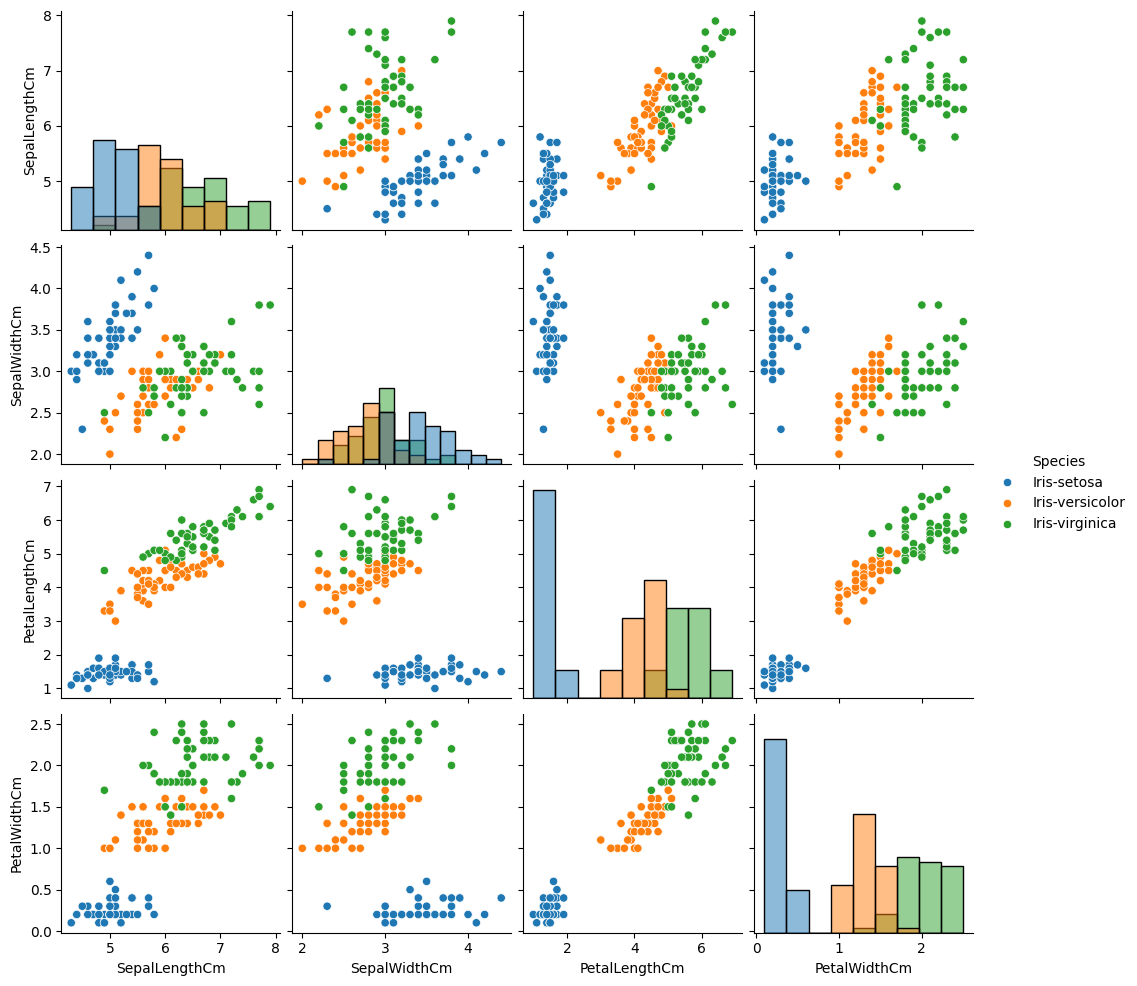

In [52]:
sns.pairplot(df, hue='Species' , kind = 'scatter' , diag_kind='hist')
#seaborn

In [53]:
# for i in range(4):
#     fig = px.histogram(df, x=df.columns[i], color="Species", facet_col="Species", histnorm="probability density", nbins=100)
#     fig.update_layout(title="Density distribution of "+df.columns[i]+" by Species")
#     fig.show()

In [54]:
df.corr(numeric_only=True) #see where are correlations between data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


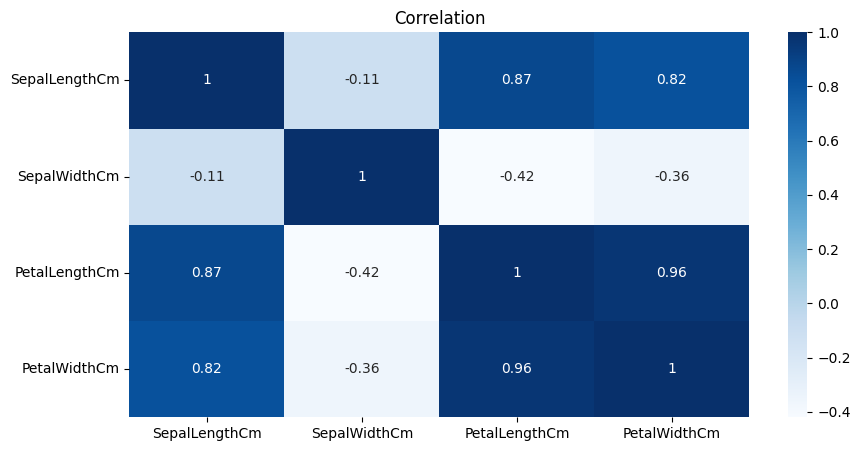

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='Blues') # annot=True for data written in cases
plt.title('Correlation')
plt.show()

#See this correlation in a map

# Data preprocessing

In [56]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

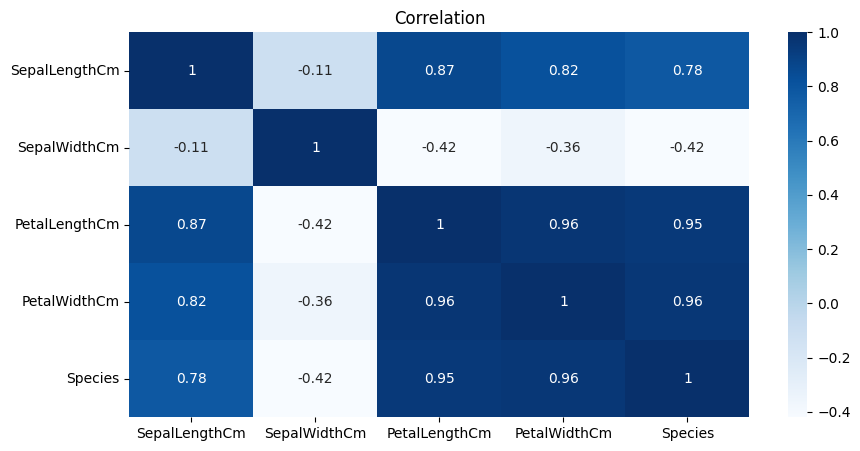

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='Blues')
plt.title('Correlation')
plt.show()

# See correlation after transformation
# Species added

# Splitting Dataset

In [58]:
x = df.drop('Species', axis = 'columns')
y = df['Species']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle=True)

# shuffle = 'melanger'

In [60]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Models

In [61]:
# TODO : Print the shape of X_train, X_test, y_train, y_test
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (120, 4)
Shape of x_test :  (30, 4)
Shape of y_train :  (120,)
Shape of y_test :  (30,)


In [62]:
iris_classifier = DecisionTreeClassifier(criterion = 'gini')
iris_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
#Decision Tree
treeModel = DecisionTreeClassifier(criterion='entropy', random_state=7)
treeModel.fit(x_train, y_train)
y_pred_tree = treeModel.predict(x_test)

DT_score = accuracy_score(y_test, y_pred_tree)
print("Accuracy score: ", DT_score)

Accuracy score:  1.0


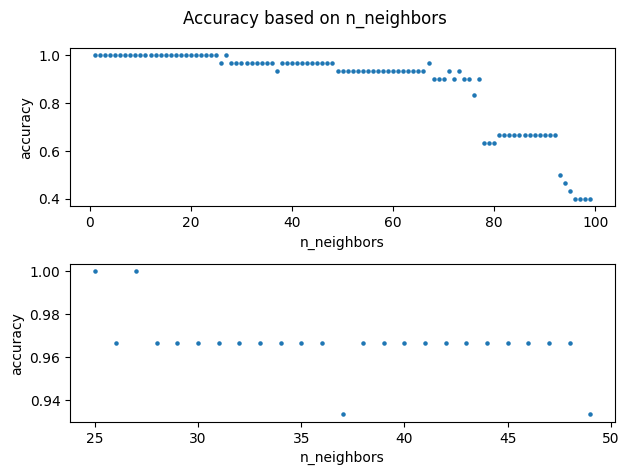

In [100]:
#KNN Neighbors
#Find the best number of neighbors

def plot_accuracy_from_range_neighbors(range_neighbors):
    scores = []

    for i in range_neighbors:
        knnModel = KNeighborsClassifier(n_neighbors=i)
        knnModel.fit(x_train, y_train)
        scores.append(knnModel.score(x_test, y_test))

    return scores


scores_1_100 = plot_accuracy_from_range_neighbors(range(1, 100))
scores_25_50 = plot_accuracy_from_range_neighbors(range(25, 50))

fig, axs = plt.subplots(2)
axs[0].scatter(range(1, 100), scores_1_100, s=5)
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("accuracy")

axs[1].scatter(range(25, 50), scores_25_50, s=5)
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("accuracy")

fig.suptitle("Accuracy based on n_neighbors")
plt.tight_layout() # Avoid superposition between graphs
plt.show()

In [101]:
#KNN Neighbors
knnModel = KNeighborsClassifier(n_neighbors=30)
knnModel.fit(x_train, y_train)
y_pred_knn = knnModel.predict(x_test)

KNN_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy score: ", KNN_score)

Accuracy score:  0.9666666666666667


In [80]:
#Support Vector
svcModel = SVC()
svcModel.fit(x_train, y_train)
y_pred_svc = svcModel.predict(x_test)

SVC_score = accuracy_score(y_test, y_pred_svc)
print("Accuracy score: ", SVC_score)

Accuracy score:  1.0


In [102]:
results = pd.DataFrame({'Score':[DT_score, KNN_score, SVC_score], 'Model':['Decision Tree','KNN', 'SVC']})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(4)

,Score
Model,
Decision Tree,1.000000
SVC,1.000000
KNN,0.966667
